
      
      Bia Chaudhry

      BESE -7B

      184055

      Natural Language Processing Project 

      Submitted to

      Ma'am Seemab Latif

---

#COMPARISON BETWEEN COSINE SIMILARITY & SOFT COSINE SIMILARITY 

# Installing packages and Importing Libraries

In [1]:
!pip install beautifulsoup4

In [2]:
!pip install lxml

In [3]:
import bs4 as bs
import urllib.request
import re
import nltk, string, numpy as np
nltk.download('wordnet') # first-time use only
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import math
import pandas as pd
import networkx as nx
from networkx.generators.small import krackhardt_kite_graph
from string import ascii_lowercase

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Extract Abstract from a webpage 

In [0]:
def abstractExtracter(url_to_go):
  scraped_data = urllib.request.urlopen(url_to_go)
  article = scraped_data.read()

  parsed_article = bs.BeautifulSoup(article,'lxml')

  paragraphs = parsed_article.find_all(id='p-2')

  article_text = ""

  for p in paragraphs:
      article_text += p.text
  return article_text

# COVID-19 related
abstract1 = abstractExtracter('https://www.medrxiv.org/content/10.1101/2020.02.24.20027052v1')
abstract2 = abstractExtracter('https://www.medrxiv.org/content/10.1101/2020.03.07.20031575v1')
abstract3 = abstractExtracter('https://www.medrxiv.org/content/10.1101/2020.03.19.20034124v1')

# Movie Characters
abstract4 = "Harry Potter is a series of fantasy novels written by British author J. K. Rowling. The novels chronicle the lives of a young wizard, Harry Potter, and his friends Hermione Granger and Ron Weasley, all of whom are students at Hogwarts School of Witchcraft and Wizardry. The main story arc concerns Harry's struggle against Lord Voldemort, a dark wizard who intends to become immortal, overthrow the wizard governing body known as the Ministry of Magic and subjugate all wizards and Muggles (non-magical people)."
abstract5 = "Cruise began acting in the early 1980s and made his breakthrough with leading roles in the comedy film Risky Business (1983) and action drama film Top Gun (1986). Critical acclaim came with his roles in the drama films The Color of Money (1986), Rain Man (1988), and Born on the Fourth of July (1989). For his portrayal of Ron Kovic in the latter, he won a Golden Globe Award and received a nomination for the Academy Award for Best Actor. As a leading Hollywood star in the 1990s, he starred in several commercially successful films, including the drama A Few Good Men (1992), the thriller The Firm (1993), the horror film Interview with the Vampire (1994), and the romance Jerry Maguire (1996). For his role in the latter, he won a Golden Globe Award for Best Actor and received his second Academy Award nomination."
abstract6 = "Spider-Man is a fictional superhero created by writer-editor Stan Lee and writer-artist Steve Ditko. He first appeared in the anthology comic book Amazing Fantasy #15 (August 1962) in the Silver Age of Comic Books. He appears in American comic books published by Marvel Comics, as well as in a number of movies, television shows, and video game adaptations set in the Marvel Universe. In the stories, Spider-Man is the alias of Peter Parker, an orphan raised by his Aunt May and Uncle Ben in New York City after his parents Richard and Mary Parker were killed in a plane crash. Lee and Ditko had the character deal with the struggles of adolescence and financial issues, and accompanied him with many supporting characters, such as J. Jonah Jameson, Harry Osborn, Max Modell, romantic interests Gwen Stacy and Mary Jane Watson, and foes such as Doctor Octopus, the Green Goblin and Venom. His origin story has him acquiring spider-related abilities after a bite from a radioactive spider; these include clinging to surfaces, shooting spider-webs from wrist-mounted devices, and detecting danger with his spider-sense."

# Sports related 
abstract7 = "Cricket is a bat-and-ball game played between two teams of eleven players on a field at the centre of which is a 20-metre (22-yard) pitch with a wicket at each end, each comprising two bails balanced on three stumps. The batting side scores runs by striking the ball bowled at the wicket with the bat, while the bowling and fielding side tries to prevent this and dismiss each player (so they are out). Means of dismissal include being bowled, when the ball hits the stumps and dislodges the bails, and by the fielding side catching the ball after it is hit by the bat, but before it hits the ground. When ten players have been dismissed, the innings ends and the teams swap roles. The game is adjudicated by two umpires, aided by a third umpire and match referee in international matches. They communicate with two off-field scorers who record the match's statistical information."
abstract8 = "Roller hockey, also known as quad hockey, international-style ball hockey, rink hockey and Hoquei em Patins, is an overarching name for a roller sport that has existed since long before inline skates were invented. This sport is played in over sixty countries and has a worldwide following. Roller hockey was a demonstration sport at the 1992 Barcelona Summer Olympics."




In [5]:
print('ABSTRACT # 1: ', abstract1)

print('\n-----------\n')

print('ABSTRACT # 2: ',abstract2)

print('\n-----------\n')

print('ABSTRACT # 3: ',abstract3)

print('\n-----------\n')

print('ABSTRACT # 4: ', abstract4)

print('\n-----------\n')

print('ABSTRACT # 5: ', abstract5)

print('\n-----------\n')

print('ABSTRACT # 6: ', abstract6)

print('\n-----------\n')

print('ABSTRACT # 7: ', abstract7)

print('\n-----------\n')

print('ABSTRACT # 8: ', abstract8)

ABSTRACT # 1:  Objective: To investigate the correlation between clinical characteristics and cardiac injury of COVID-2019 pneumonia. 
Methods: In this retrospective, single-center study, 41 consecutive corona virus disease 2019 (COVID-2019) patients (including 2 deaths) of COVID-2019 in Beijing Youan Hospital, China Jan 21 to Feb 03, 2020, were involved in this study. The high risk factors of cardiac injury in different COVID-2019 patients were analyzed. Computed tomographic (CT) imaging of epicardial adipose tissue (EAT) has been used to demonstrate the cardiac inflammation of COVID-2019.
Results：Of the 41 COVID-2019 patients, 2 (4.88%), 32 (78.05%), 4 (9.75%) and 3 (7.32%) patients were clinically diagnosed as light, mild, severe and critical cases, according to the 6th guidance issued by the National Health Commission of China. 10 (24.4%) patients had underlying complications, such as hypertension, CAD, type 2 diabetes mellites and tumor. The peak value of TnI in critical patients 

# Creating Documents

In [0]:
def fileWriter(filename, content):
  abs_file = open(filename, mode='w+')
  abs_file.write(content)

fileWriter('doc3.txt', abstract3)

In [0]:
d1 = abstract1
d2 = abstract2
d3 = abstract3
d4 = abstract4
d5 = abstract5
d6 = abstract6
d7 = abstract7
d8 = abstract8


documents = [d1, d2, d3, d4, d5, d6, d7, d8]

# Data Preprocessing

In [0]:
lemmer = nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [9]:
LemVectorizer = CountVectorizer(tokenizer=LemNormalize, stop_words='english')
LemVectorizer.fit_transform(documents)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


<8x544 sparse matrix of type '<class 'numpy.int64'>'
	with 624 stored elements in Compressed Sparse Row format>

In [10]:
LemVectorizer.vocabulary_

{'0025': 0,
 '0158': 1,
 '03': 2,
 '0987': 3,
 '10': 4,
 '102': 5,
 '1187': 6,
 '1206': 7,
 '13': 8,
 '15': 9,
 '1548': 10,
 '160': 11,
 '1912': 12,
 '1962': 13,
 '1980s': 14,
 '1983': 15,
 '1986': 16,
 '1988': 17,
 '1989': 18,
 '1990s': 19,
 '1992': 20,
 '1993': 21,
 '1994': 22,
 '1996': 23,
 '2': 24,
 '20': 25,
 '2019': 26,
 '2020': 27,
 '20metre': 28,
 '21': 29,
 '22yard': 30,
 '2350': 31,
 '244': 32,
 '3': 33,
 '3079': 34,
 '32': 35,
 '4': 36,
 '40fold': 37,
 '41': 38,
 '425625': 39,
 '4580': 40,
 '48': 41,
 '488': 42,
 '50316': 43,
 '525': 44,
 '54': 45,
 '64': 46,
 '6th': 47,
 '732': 48,
 '7805': 49,
 '84': 50,
 '8864': 51,
 '95': 52,
 '975': 53,
 'ability': 54,
 'abnormal': 55,
 'abnormality': 56,
 'academy': 57,
 'acclaim': 58,
 'accompanied': 59,
 'according': 60,
 'acquiring': 61,
 'act': 62,
 'acting': 63,
 'action': 64,
 'actor': 65,
 'acute': 66,
 'adaptation': 67,
 'addition': 68,
 'adipose': 69,
 'adjudicated': 70,
 'adjusting': 71,
 'adolescence': 72,
 'adult': 73,
 'ag

# TF_IDF Calculations

In [11]:
tf_matrix = LemVectorizer.transform(documents).toarray()
print (tf_matrix)

[[0 0 1 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
tf_matrix.shape

(8, 544)

In [13]:
tfidfTran = TfidfTransformer(norm="l2")
tfidfTran.fit(tf_matrix)
print (tfidfTran.idf_)

[2.5040774  2.5040774  2.5040774  2.5040774  2.5040774  2.5040774
 2.5040774  2.5040774  2.5040774  2.5040774  2.5040774  2.5040774
 2.5040774  2.5040774  2.5040774  2.5040774  2.5040774  2.5040774
 2.5040774  2.5040774  2.09861229 2.5040774  2.5040774  2.5040774
 1.81093022 2.5040774  2.09861229 2.09861229 2.5040774  2.09861229
 2.5040774  2.5040774  2.5040774  2.5040774  2.5040774  2.5040774
 2.09861229 2.5040774  2.5040774  2.5040774  2.5040774  2.5040774
 2.5040774  2.5040774  2.5040774  2.5040774  2.5040774  2.5040774
 2.5040774  2.5040774  2.5040774  2.5040774  2.5040774  2.5040774
 2.5040774  2.09861229 2.5040774  2.5040774  2.5040774  2.5040774
 2.5040774  2.5040774  2.5040774  2.5040774  2.5040774  2.5040774
 2.5040774  2.5040774  2.5040774  2.5040774  2.5040774  2.5040774
 2.5040774  2.5040774  2.09861229 2.5040774  2.5040774  2.5040774
 2.5040774  2.5040774  2.5040774  2.09861229 2.5040774  2.5040774
 2.5040774  2.5040774  2.5040774  2.5040774  2.5040774  2.5040774
 2.504077

In [14]:
def idf(n,df):
    result = math.log((n+1.0)/(df+1.0)) + 1
    return result
print( "The idf for terms that appear in one document: " + str(idf(4,1)))
print( "The idf for terms that appear in two documents: " + str(idf(4,2)))

The idf for terms that appear in one document: 1.916290731874155
The idf for terms that appear in two documents: 1.5108256237659907


In [15]:
tfidf_matrix = tfidfTran.transform(tf_matrix)
print (tfidf_matrix.toarray())

[[0.         0.         0.05690053 ... 0.         0.05690053 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.04549598 0.04549598 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.08517796 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


# Cosine Similarity Matrix

In [16]:
cos_similarity_matrix = (tfidf_matrix * tfidf_matrix.T).toarray()
print (cos_similarity_matrix)

[[1.         0.31494383 0.22431601 0.         0.01490693 0.00194864
  0.00384484 0.00839603]
 [0.31494383 1.         0.27191561 0.00848904 0.         0.00338107
  0.00667113 0.01942379]
 [0.22431601 0.27191561 1.         0.         0.01260042 0.00816564
  0.00614843 0.01118869]
 [0.         0.00848904 0.         1.         0.0071785  0.05126799
  0.         0.01051885]
 [0.01490693 0.         0.01260042 0.0071785  1.         0.
  0.01692371 0.00717347]
 [0.00194864 0.00338107 0.00816564 0.05126799 0.         1.
  0.01726673 0.00837903]
 [0.00384484 0.00667113 0.00614843 0.         0.01692371 0.01726673
  1.         0.03306504]
 [0.00839603 0.01942379 0.01118869 0.01051885 0.00717347 0.00837903
  0.03306504 1.        ]]


In [17]:
df = pd.DataFrame(cos_similarity_matrix, index= ['doc1','doc2','doc3', 'doc4', 'doc5', 'doc6', 'doc7', 'doc8'], columns=['doc1','doc2','doc3', 'doc4', 'doc5', 'doc6', 'doc7', 'doc8'])
df

,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8
doc1,1.000000,0.314944,0.224316,0.000000,0.014907,0.001949,0.003845,0.008396
doc2,0.314944,1.000000,0.271916,0.008489,0.000000,0.003381,0.006671,0.019424
doc3,0.224316,0.271916,1.000000,0.000000,0.012600,0.008166,0.006148,0.011189
doc4,0.000000,0.008489,0.000000,1.000000,0.007178,0.051268,0.000000,0.010519
doc5,0.014907,0.000000,0.012600,0.007178,1.000000,0.000000,0.016924,0.007173
doc6,0.001949,0.003381,0.008166,0.051268,0.000000,1.000000,0.017267,0.008379
doc7,0.003845,0.006671,0.006148,0.000000,0.016924,0.017267,1.000000,0.033065
doc8,0.008396,0.019424,0.011189,0.010519,0.007173,0.008379,0.033065,1.000000


In [0]:
df.to_csv('sim_matrix.csv')

In [19]:
cos_similarity_matrix

array([[1.        , 0.31494383, 0.22431601, 0.        , 0.01490693,
        0.00194864, 0.00384484, 0.00839603],
       [0.31494383, 1.        , 0.27191561, 0.00848904, 0.        ,
        0.00338107, 0.00667113, 0.01942379],
       [0.22431601, 0.27191561, 1.        , 0.        , 0.01260042,
        0.00816564, 0.00614843, 0.01118869],
       [0.        , 0.00848904, 0.        , 1.        , 0.0071785 ,
        0.05126799, 0.        , 0.01051885],
       [0.01490693, 0.        , 0.01260042, 0.0071785 , 1.        ,
        0.        , 0.01692371, 0.00717347],
       [0.00194864, 0.00338107, 0.00816564, 0.05126799, 0.        ,
        1.        , 0.01726673, 0.00837903],
       [0.00384484, 0.00667113, 0.00614843, 0.        , 0.01692371,
        0.01726673, 1.        , 0.03306504],
       [0.00839603, 0.01942379, 0.01118869, 0.01051885, 0.00717347,
        0.00837903, 0.03306504, 1.        ]])

# Similarity Network Graph 

{0: Text(0.841745585842018, -0.1437313721044677, 'a'),
 1: Text(0.5297857290918704, -0.2615199885583736, 'b'),
 2: Text(0.5934057698571252, 0.04406766487710522, 'c'),
 3: Text(-0.9999999999999999, 0.17826968106296096, 'd'),
 4: Text(0.2360313503960871, 0.7331077256377565, 'e'),
 5: Text(-0.8442270937553488, -0.40162029201579447, 'f'),
 6: Text(-0.17459786712837505, -0.3511607037451265, 'g'),
 7: Text(-0.18214347430337682, 0.20258728484593966, 'h')}

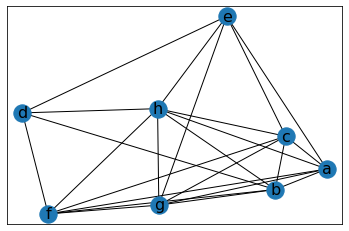

In [20]:

G = nx.from_numpy_matrix(np.array(cos_similarity_matrix))
pos=nx.spring_layout(G)
labels = {}
for idx, node in enumerate(G.nodes()):
    labels[node] = ascii_lowercase[idx]
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, labels, font_size=16)

# Soft Cosine Similarity

## Importing Libraries and Downloading FastText pre-trained embeddings

In [0]:
#SOFT COSINE

import gensim
# upgrade gensim if you can't import softcossim
from gensim.matutils import softcossim 
from gensim import corpora
import gensim.downloader as api
from gensim.utils import simple_preprocess
print(gensim.__version__)
#> '3.6.0'

# Download the FastText model
fasttext_model300 = api.load('fasttext-wiki-news-subwords-300')

## Preparing Documents for Similarity Calculations

In [22]:
# Prepare a dictionary and a corpus.
dictionary = corpora.Dictionary([simple_preprocess(doc) for doc in documents])

# Prepare the similarity matrix
similarity_matrix = fasttext_model300.similarity_matrix(dictionary, tfidf=None, threshold=0.0, exponent=2.0, nonzero_limit=100)

# Convert the sentences into bag-of-words vectors.
sent_1 = dictionary.doc2bow(simple_preprocess(d1))
sent_2 = dictionary.doc2bow(simple_preprocess(d2))
sent_3 = dictionary.doc2bow(simple_preprocess(d3))
sent_4 = dictionary.doc2bow(simple_preprocess(d4))
sent_5 = dictionary.doc2bow(simple_preprocess(d5))
sent_6 = dictionary.doc2bow(simple_preprocess(d6))
sent_7 = dictionary.doc2bow(simple_preprocess(d7))
sent_8 = dictionary.doc2bow(simple_preprocess(d8))

sentences = [sent_1, sent_2, sent_3, sent_4, sent_5, sent_6, sent_7, sent_8]

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


## Soft Cosine Similarity Matrix

In [0]:
import numpy as np
import pandas as pd

def create_soft_cossim_matrix(sentences):
    len_array = np.arange(len(sentences))
    xx, yy = np.meshgrid(len_array, len_array)
    cossim_mat = pd.DataFrame([[round(softcossim(sentences[i],sentences[j], similarity_matrix) ,2) for i, j in zip(x,y)] for y, x in zip(xx, yy)])
    return cossim_mat

soft = create_soft_cossim_matrix(sentences)

In [24]:
soft

,0,1,2,3,4,5,6,7
0,1.00,0.86,0.86,0.65,0.75,0.73,0.69,0.40
1,0.86,1.00,0.78,0.57,0.68,0.65,0.65,0.40
2,0.86,0.78,1.00,0.65,0.71,0.72,0.69,0.42
3,0.65,0.57,0.65,1.00,0.65,0.70,0.64,0.34
4,0.75,0.68,0.71,0.65,1.00,0.78,0.75,0.38
5,0.73,0.65,0.72,0.70,0.78,1.00,0.74,0.43
6,0.69,0.65,0.69,0.64,0.75,0.74,1.00,0.46
7,0.40,0.40,0.42,0.34,0.38,0.43,0.46,1.00


# Soft Cosine Similarity Network Graph

{0: Text(0.5493962762436561, 0.35848933862869, 'a'),
 1: Text(-0.17672259010990607, -0.04027416548680531, 'b'),
 2: Text(-0.41582659408412376, 0.5109643940084911, 'c'),
 3: Text(0.4121130346081521, -0.6954231904792567, 'd'),
 4: Text(-0.24189609010584057, -0.6216772584907388, 'e'),
 5: Text(0.7260350879452805, -0.15844942825209118, 'f'),
 6: Text(0.14690087550278308, 0.7391572228312548, 'g'),
 7: Text(-1.0, -0.09278691275954416, 'h')}

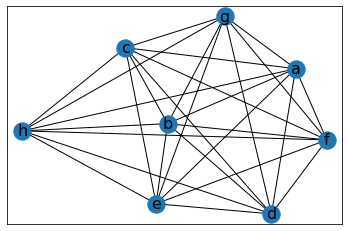

In [25]:
import networkx as nx
import numpy as np

from networkx.generators.small import krackhardt_kite_graph
from string import ascii_lowercase
G = nx.from_numpy_matrix(np.array(soft))
pos=nx.spring_layout(G)
labels = {}
for idx, node in enumerate(G.nodes()):
    labels[node] = ascii_lowercase[idx]
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, labels, font_size=16)

# Evaluations and Results

In [45]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = np.array(soft) # soft can be replaced with cos_similarity_matrix to generate its Dendogram and clusters
clustering = AgglomerativeClustering( n_clusters=3).fit(X)

AgglomerativeClustering(n_clusters=3)
clustering.labels_


array([2, 2, 2, 0, 0, 0, 0, 1])

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
X = [[i] for i in clustering.labels_]
X

[[2], [2], [2], [0], [0], [0], [0], [1]]

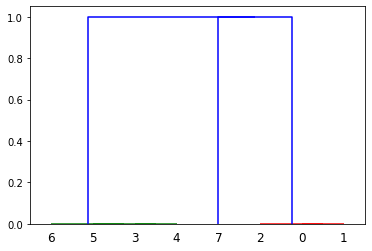

In [47]:
Z = linkage(X, 'single')
fig = plt.figure()
dn = dendrogram(Z)

## Accuracy

In [0]:
Cos_Clusters_Predicted =  [[1], [1], [1], [2], [0], [2], [0], [1]]
Soft_Clusters_Predicted = [[2], [2], [2], [0], [0], [0], [0], [1]]

Cos_Clusters_Actual =  [[1], [1], [1], [2], [2], [2], [0], [0]]
Soft_Clusters_Actual = [[2], [2], [2], [0], [0], [0], [1], [1]]


Accuracy or Correct Rate

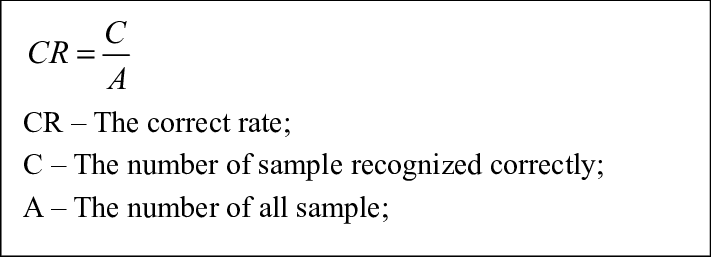

In [0]:
Soft_Accuracy = 7/8 * 100
Cos_Accuracy = 7/8 * 100

In [51]:
print("Soft Cosine Accuracy: ", Soft_Accuracy)

print("Cosine Accuracy: ", Cos_Accuracy)

Soft Cosine Accuracy:  87.5
Cosine Accuracy:  87.5


In [0]:
-- END ---